In [2]:
#Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#%matplotlib inline
#from matplotlib import style
#style.use('fivethirtyeight')

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
con = engine.connect()

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recentdate.date)

2017-08-23


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
oneyeardate = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcponeyear = session.query(Measurement.date, Measurement.prcp).\
    filter((Measurement.date <= recentdate.date) & (Measurement.date >= oneyeardate)).all()

#prcponeyear

('2016-08-23', 0.0)

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcponeyear, columns=['date', 'precipitation'])
prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df.sort_values('date')

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


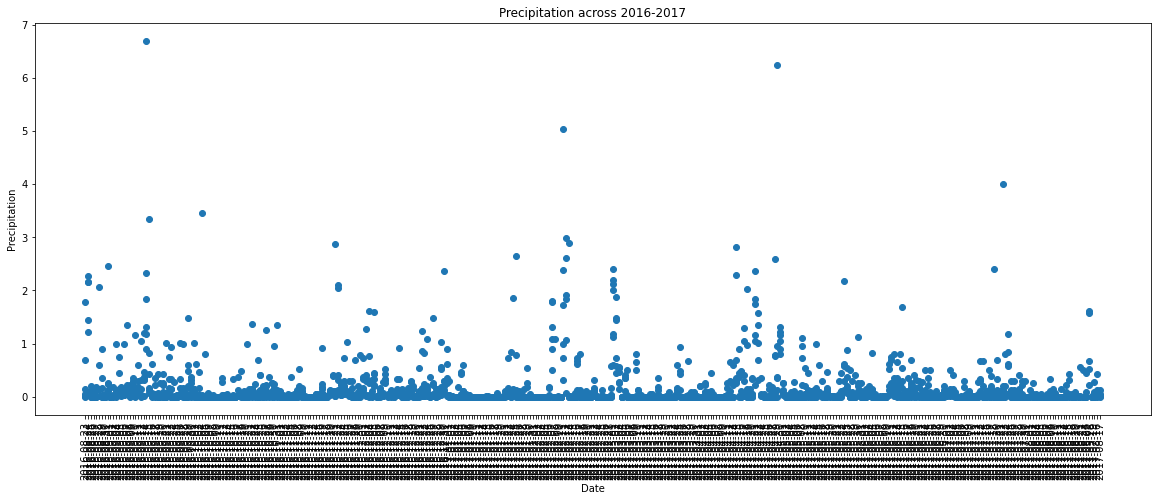

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,8))
plt.scatter(prcp_df.date, prcp_df.precipitation)
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.title('Precipitation across 2016-2017')
plt.subplots_adjust(bottom=0.2)
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

# may have to find other measurements

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [7]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement).group_by(Measurement.station).count()

9

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(71.66378066378067,)]

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temponeyear = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date <= recentdate.date) & (Measurement.date >= oneyeardate)).all()

#temp_df = pd.DataFrame(temponeyear)


[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


# Close session

In [16]:
# Close Session
session.close()